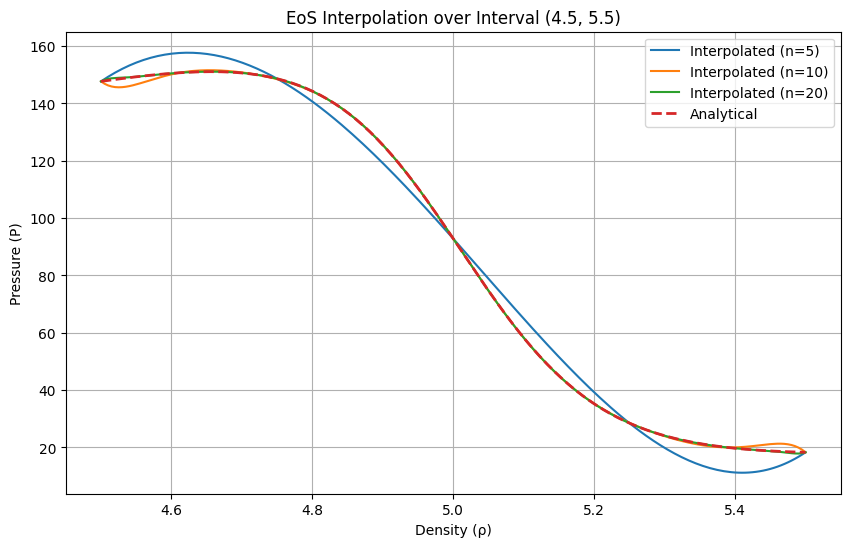

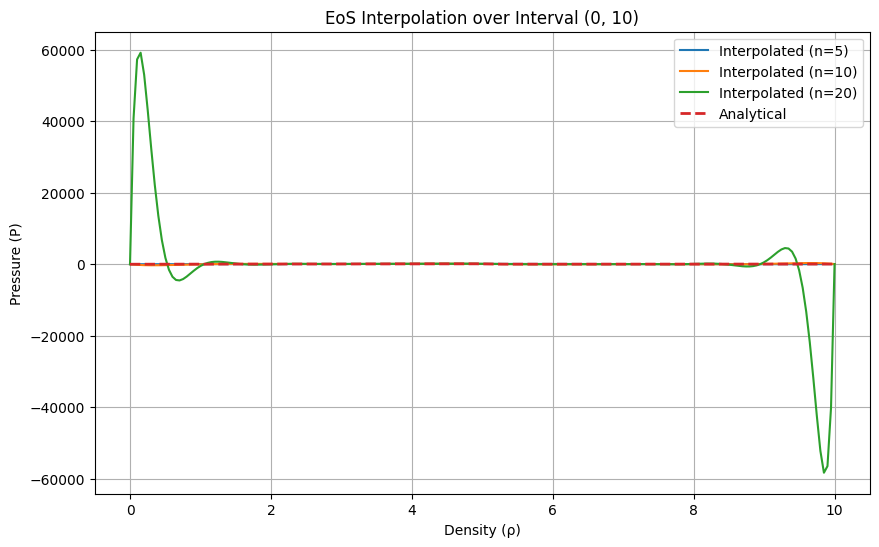

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Constants for the EoS
Γ1, Γ2 = 4/3, 5/3
κ1, κ2 = 20, 1
ρ_T = 5
α = 5


def heaviside_exp(x):
    return 1 / (1 + np.exp(-2 * α * x))

def heaviside_tanh(x):
    return 0.5 * (1 + np.tanh(α * x))


def hybrid_eos(ρ, H_func):
    return H_func(ρ_T - ρ) * κ1 * ρ**Γ1 + H_func(ρ - ρ_T) * κ2 * ρ**Γ2

def lagrange_interp(xs, ys, x): #Lagrange Polynomial Interpolation
    n = len(xs)
    interpolated_value = 0
    for i in range(n):
        term = ys[i]
        for j in range(n):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        interpolated_value += term
    return interpolated_value

def generate_data(interval, n, H_func): #Generate data
    ρs = np.linspace(interval[0], interval[1], n)
    Ps = hybrid_eos(ρs, H_func)
    return ρs, Ps


def chi_square_error(f, xs, ys): #Chi-square error
    errors = (f(xs) - ys)**2
    return np.sqrt(np.mean(errors))


def analyze_eos(): #Plot
    intervals = [(4.5, 5.5), (0, 10)]
    n_values = [5, 10, 20]
    
    for interval in intervals:
        plt.figure(figsize=(10, 6))
        ρ_exact = np.linspace(interval[0], interval[1], 200)
        P_exact = hybrid_eos(ρ_exact, heaviside_exp)
        
        for n in n_values:
            ρs, Ps = generate_data(interval, n, heaviside_exp)
            P_interp = [lagrange_interp(ρs, Ps, ρ) for ρ in ρ_exact]
            plt.plot(ρ_exact, P_interp, label=f'Interpolated (n={n})')
        
        plt.plot(ρ_exact, P_exact, label='Analytical', linestyle='dashed', linewidth=2)
        plt.title(f'EoS Interpolation over Interval {interval}')
        plt.xlabel('Density (ρ)')
        plt.ylabel('Pressure (P)')
        plt.legend()
        plt.grid()
        plt.show()

analyze_eos()

#### a) Errors decrease significantly as n increases. errors for smaller n due to the rapid change in slope
#### b) For I = [0,10], the interpolation errors are compared to I=[4.5,5.5], especially for small n

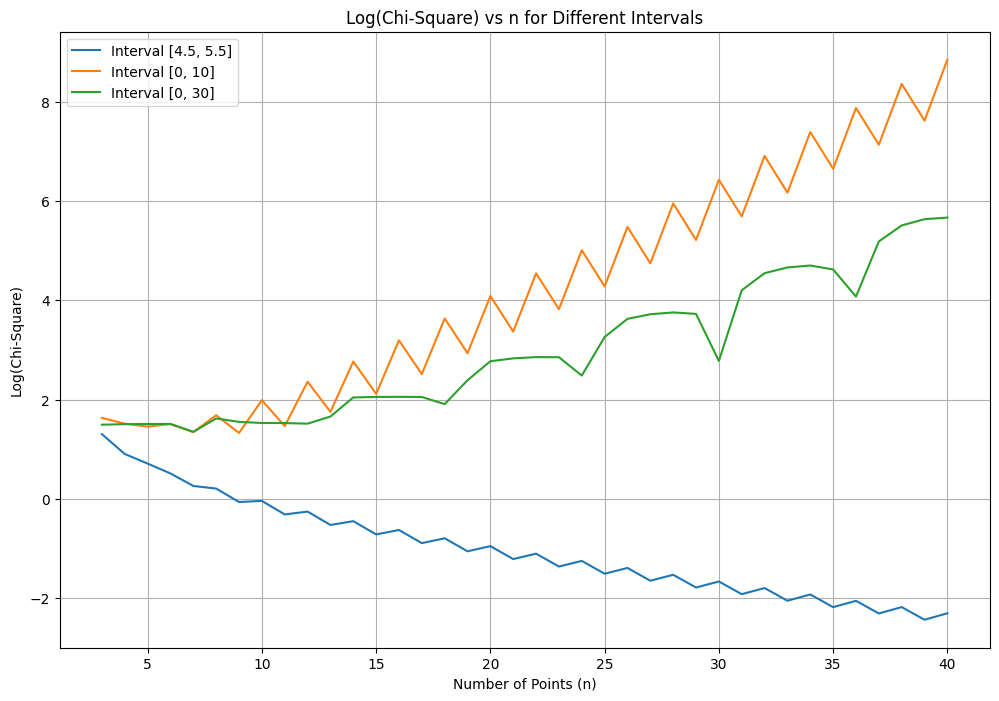

In [7]:
# Part C

ρ_T = 5 

def hybrid_eos(ρ, H_func, Γ1, Γ2, κ1, κ2, α):
    def heaviside_exp(x):
        return 1 / (1 + np.exp(-2 * α * x))
    return H_func(ρ_T - ρ) * κ1 * ρ**Γ1 + H_func(ρ - ρ_T) * κ2 * ρ**Γ2


def lagrange_interp(xs, ys, x):
    n = len(xs)
    interpolated_value = 0
    for i in range(n):
        term = ys[i]
        for j in range(n):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        interpolated_value += term
    return interpolated_value


def generate_data(interval, n, Γ1, Γ2, κ1, κ2, α):
    ρs = np.linspace(interval[0], interval[1], n)
    Ps = hybrid_eos(ρs, lambda x: 1 / (1 + np.exp(-2 * α * x)), Γ1, Γ2, κ1, κ2, α)
    return ρs, Ps


def chi_square_error(f, xs, ys):
    errors = (f(xs) - ys)**2
    return np.sqrt(np.mean(errors))


def compute_and_plot_log_error(intervals, n_range):
    plt.figure(figsize=(12, 8))

    for interval in intervals:
        log_errors = []
        ns = []

        for n in n_range:
            ρ_exact = np.linspace(interval[0], interval[1], 200)
            P_exact = hybrid_eos(ρ_exact, lambda x: 1 / (1 + np.exp(-2 * 5 * x)), 4/3, 5/3, 20, 1, 5)

            ρs, Ps = generate_data(interval, n, 4/3, 5/3, 20, 1, 5)
            P_interp = np.array([lagrange_interp(ρs, Ps, ρ) for ρ in ρ_exact])

            chi_error = chi_square_error(lambda ρ: hybrid_eos(ρ, lambda x: 1 / (1 + np.exp(-2 * 5 * x)), 4/3, 5/3, 20, 1, 5), ρ_exact, P_interp)
            log_errors.append(np.log10(chi_error))
            ns.append(n)

        plt.plot(ns, log_errors, label=f"Interval {interval}")

    plt.title("Log(Chi-Square) vs n for Different Intervals")
    plt.xlabel("Number of Points (n)")
    plt.ylabel("Log(Chi-Square)")
    plt.legend()
    plt.grid()
    plt.show()

intervals = [[4.5, 5.5], [0, 10], [0, 30]]
n_range = range(3, 41)

compute_and_plot_log_error(intervals, n_range)

Testing Parameters: Γ1=1.3333333333333333, Γ2=1.6666666666666667, κ1=20, κ2=1, α=2


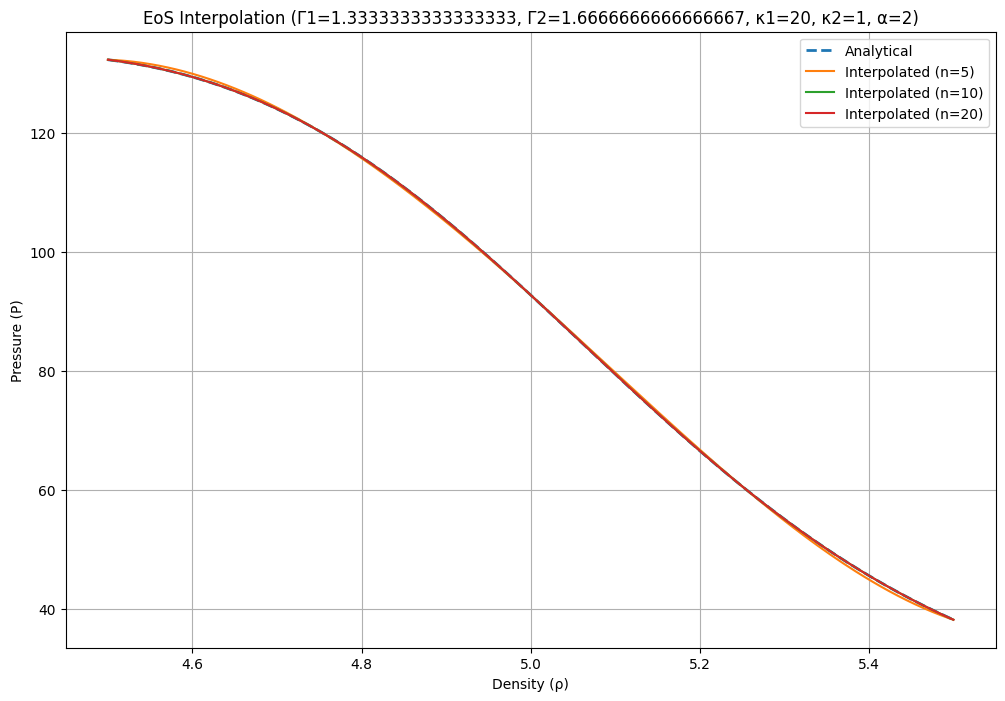

Testing Parameters: Γ1=1.3333333333333333, Γ2=1.6666666666666667, κ1=20, κ2=1, α=10


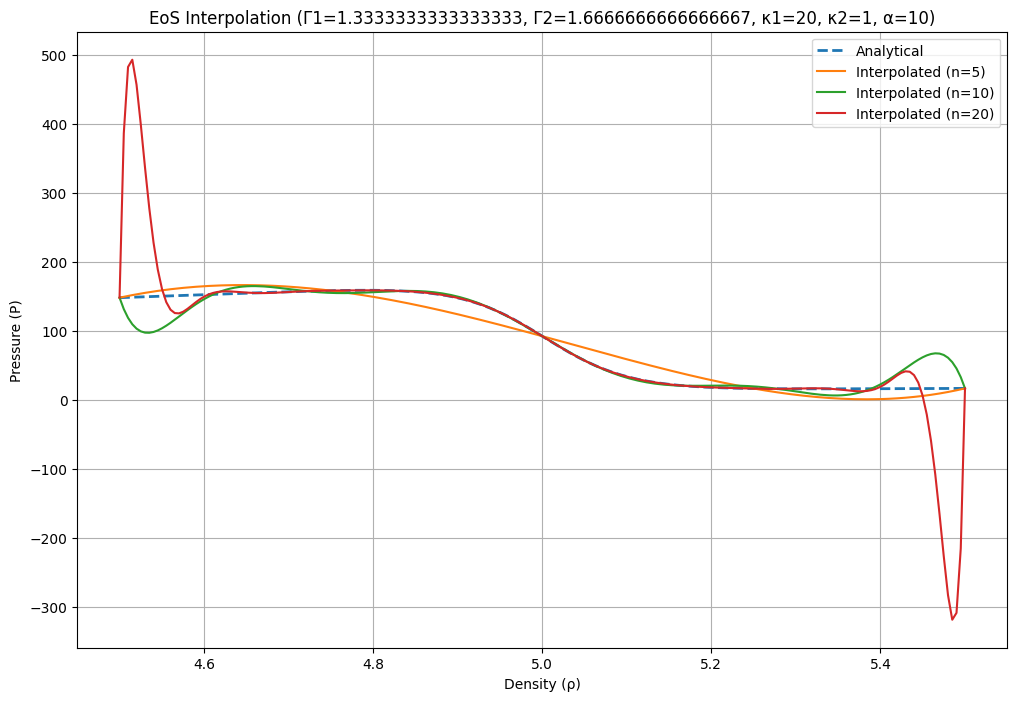

Testing Parameters: Γ1=1.6666666666666667, Γ2=2.0, κ1=20, κ2=1, α=5


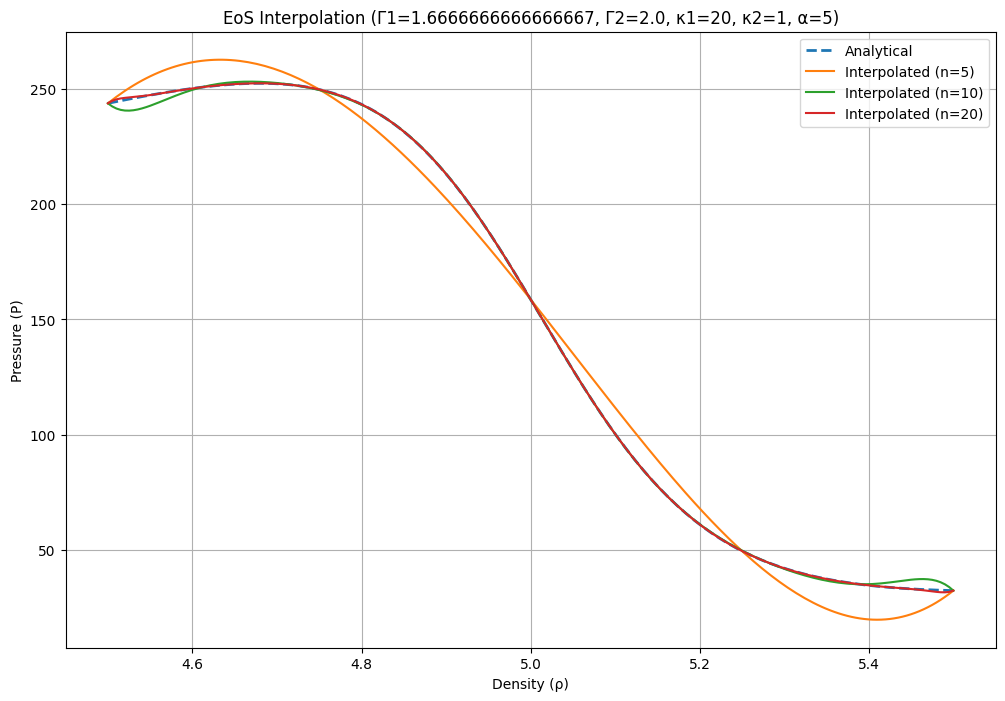

Testing Parameters: Γ1=1.3333333333333333, Γ2=1.6666666666666667, κ1=50, κ2=2, α=5


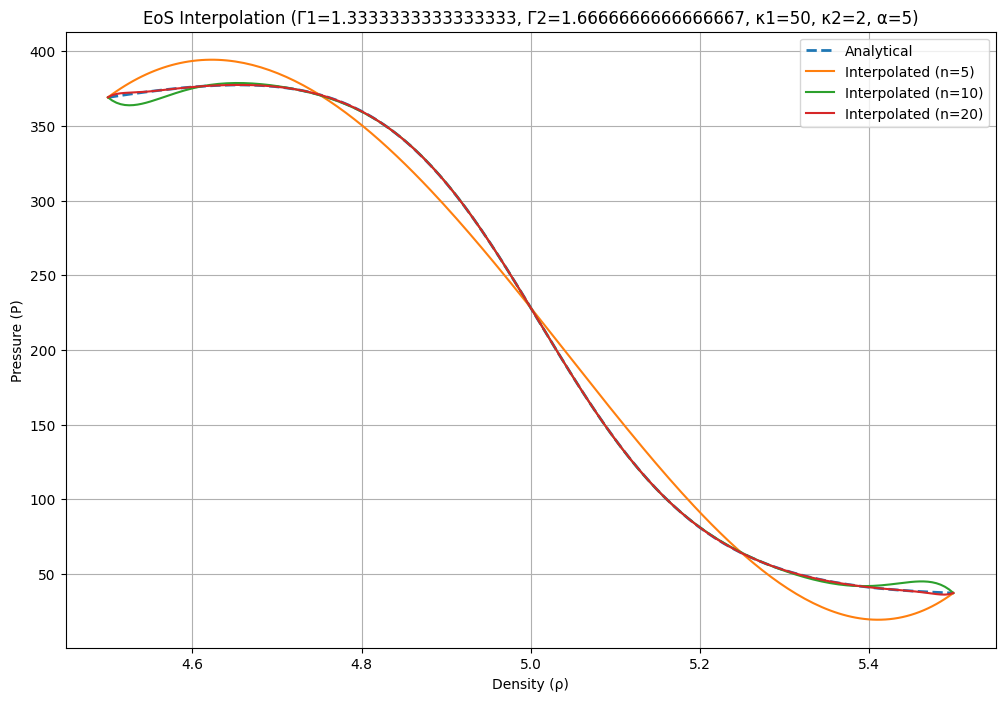

In [8]:
# Part D

ρ_T = 5  

def hybrid_eos(ρ, H_func, Γ1, Γ2, κ1, κ2, α): #EoS function with adjustable parameters
    def heaviside_exp(x):
        return 1 / (1 + np.exp(-2 * α * x))
    return H_func(ρ_T - ρ) * κ1 * ρ**Γ1 + H_func(ρ - ρ_T) * κ2 * ρ**Γ2

def lagrange_interp(xs, ys, x):
    n = len(xs)
    interpolated_value = 0
    for i in range(n):
        term = ys[i]
        for j in range(n):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        interpolated_value += term
    return interpolated_value

def generate_data(interval, n, Γ1, Γ2, κ1, κ2, α):
    ρs = np.linspace(interval[0], interval[1], n)
    Ps = hybrid_eos(ρs, lambda x: 1 / (1 + np.exp(-2 * α * x)), Γ1, Γ2, κ1, κ2, α)
    return ρs, Ps


def explore_parameters(interval, n_values, param_variations):
    for params in param_variations:
        Γ1, Γ2, κ1, κ2, α = params
        print(f"Testing Parameters: Γ1={Γ1}, Γ2={Γ2}, κ1={κ1}, κ2={κ2}, α={α}")
        
        ρ_exact = np.linspace(interval[0], interval[1], 200)
        P_exact = hybrid_eos(ρ_exact, lambda x: 1 / (1 + np.exp(-2 * α * x)), Γ1, Γ2, κ1, κ2, α)

        plt.figure(figsize=(12, 8))
        plt.plot(ρ_exact, P_exact, label='Analytical', linestyle='dashed', linewidth=2)

        for n in n_values:
            ρs, Ps = generate_data(interval, n, Γ1, Γ2, κ1, κ2, α)
            P_interp = np.array([lagrange_interp(ρs, Ps, ρ) for ρ in ρ_exact])

            
            plt.plot(ρ_exact, P_interp, label=f'Interpolated (n={n})')

        plt.title(f'EoS Interpolation (Γ1={Γ1}, Γ2={Γ2}, κ1={κ1}, κ2={κ2}, α={α})')
        plt.xlabel('Density (ρ)')
        plt.ylabel('Pressure (P)')
        plt.legend()
        plt.grid()
        plt.show()

#Parameters
interval = [4.5, 5.5]
n_values = [5, 10, 20]
param_variations = [
    (4/3, 5/3, 20, 1, 2), 
    (4/3, 5/3, 20, 1, 10), 
    (5/3, 6/3, 20, 1, 5),  
    (4/3, 5/3, 50, 2, 5),  
]

explore_parameters(interval, n_values, param_variations)